<a href="https://colab.research.google.com/github/SourLemon23/blueprint-2021/blob/main/Body_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Authorize access to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# MPI model
numKeyPoints = 15
threshold = 0.1

POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [5]:
# # Downloading the pose-model trained on COCO
# COCO_POSE_URL="https://www.dropbox.com/s/2h2bv29a130sgrk/pose_iter_440000.caffemodel"
# COCO_FOLDER="pose/coco/"
# !wget -c ${COCO_POSE_URL} -P ${COCO_FOLDER}

# # Downloading the pose-model trained on MPI
# MPI_POSE_URL="https://www.dropbox.com/s/drumc6dzllfed16/pose_iter_160000.caffemodel"
# MPI_FOLDER="pose/mpi/"
# !wget -c ${MPI_POSE_URL} -P ${MPI_FOLDER}

In [8]:
# Specify the paths for the 2 files
protoFile = "/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/pose_iter_160000.caffemodel"

# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

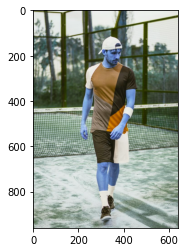

In [57]:
img_path = '/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/single.jpeg'
img = cv2.imread(img_path)
copiedImg = np.copy(img)

frameWidth = img.shape[1]
frameHeight = img.shape[0]

plt.imshow(img)
plt.show()

In [58]:
# Specify the input image dimensions
inWidth = 368
inHeight = 368

# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(img, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [59]:
output = net.forward()

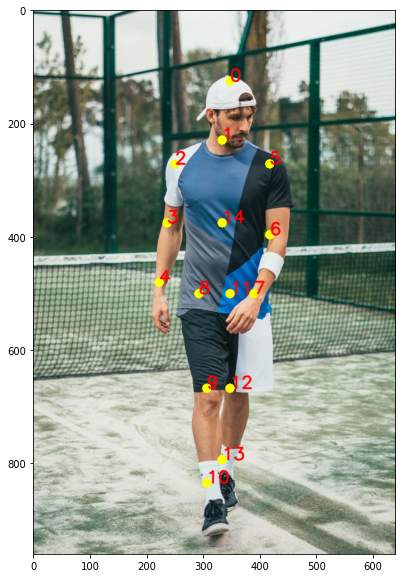

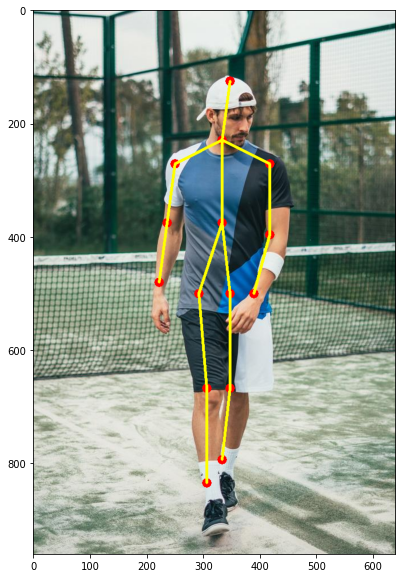

In [60]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []

for i in range(numKeyPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold: 
        cv2.circle(copiedImg, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(copiedImg, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(img, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(img, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(copiedImg, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))